In [1]:
import numpy as np # for some data preprocessing
import pandas as pd # providing the pandas dataframe
import matplotlib.pyplot as plt # for visualization
import seaborn as sns # for visualization
import warnings # to remove warnings within the jupyter file
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive # mount the drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df=pd.read_csv('/content/drive/MyDrive/Health App/Breast_cancer_data.csv') # convert csv into pandas data frame

In [4]:
df.head() # to see the top columns

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [5]:
df.shape # to see the shape

(569, 6)

In [6]:
df.describe() # for statistical analysis

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


In [7]:
df.diagnosis.value_counts() # To see the value counts

1    357
0    212
Name: diagnosis, dtype: int64

In [8]:
df.isnull().sum() # To see whether there is any null

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

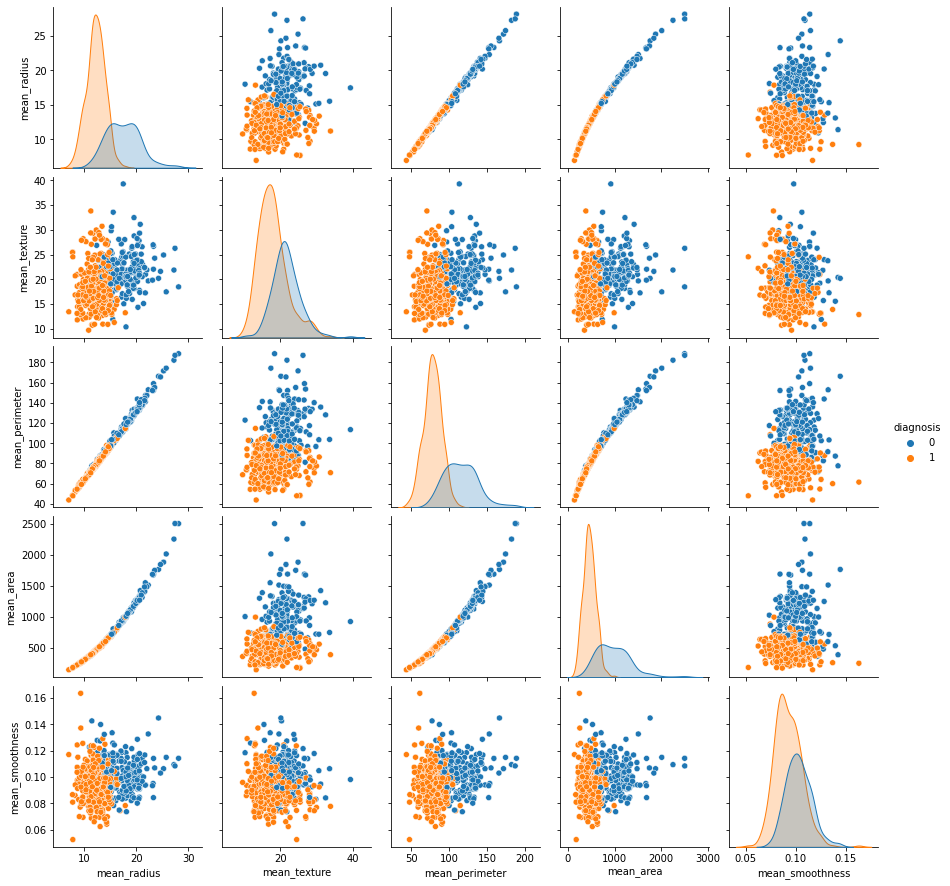

In [9]:
sns.pairplot(data=df,hue='diagnosis') # pairplot to see the data distribution

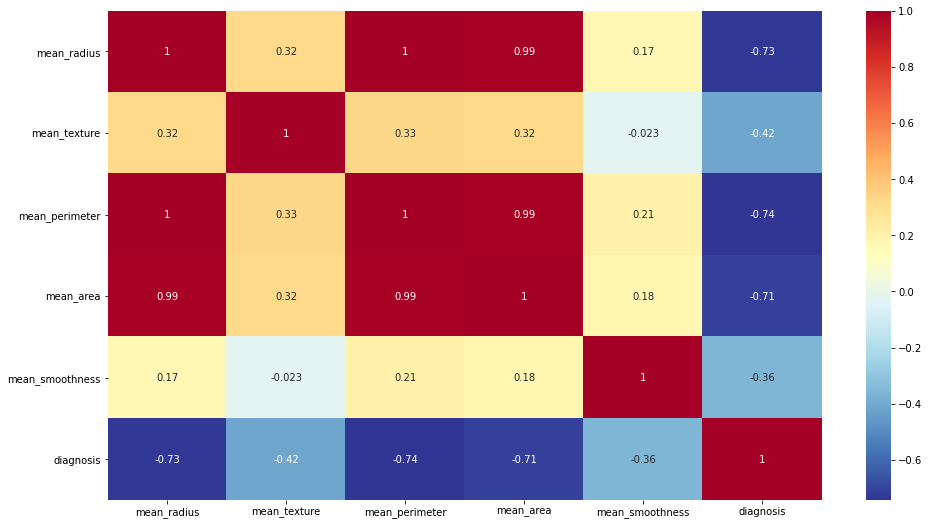

In [10]:
plt.figure(figsize=(16,9)) 
sns.heatmap(df.corr(),annot=True,cmap='RdYlBu_r') # plotting heatmap with corr

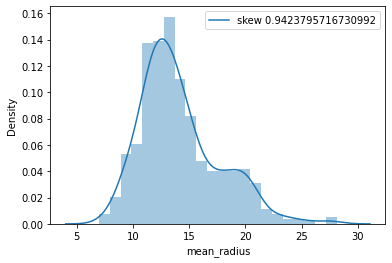

In [11]:
sns.distplot(df.mean_radius).legend([f"skew {str(df.mean_radius.skew())}"]) # To see the distribution of mean_radius

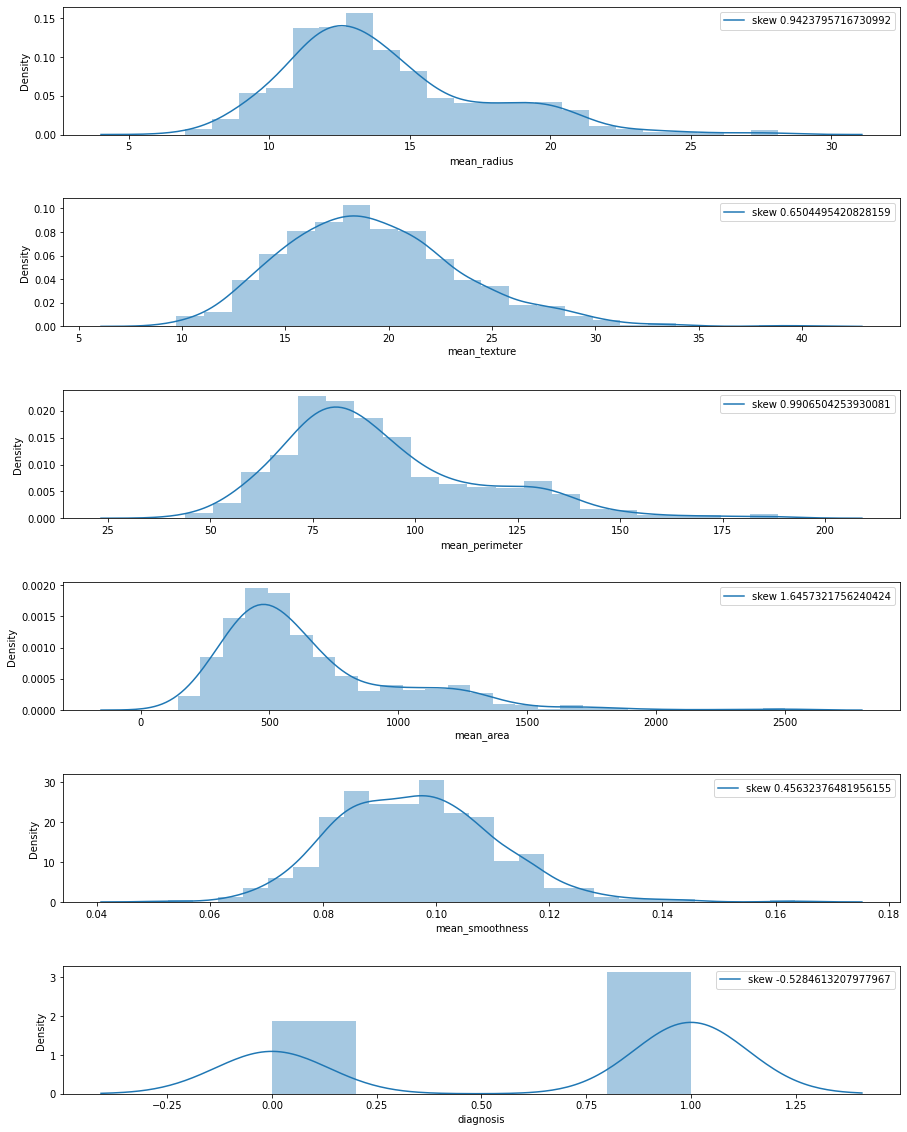

In [12]:
plt.figure(figsize=(15,20)) 
for i, col in enumerate(df.columns):
  plt.subplot(6,1,i+1)
  plt.subplots_adjust(wspace=0.5,hspace=0.5)
  sns.distplot(df[col]).legend([f"skew {str(df[col].skew())}"]) # To see the distribuition of data

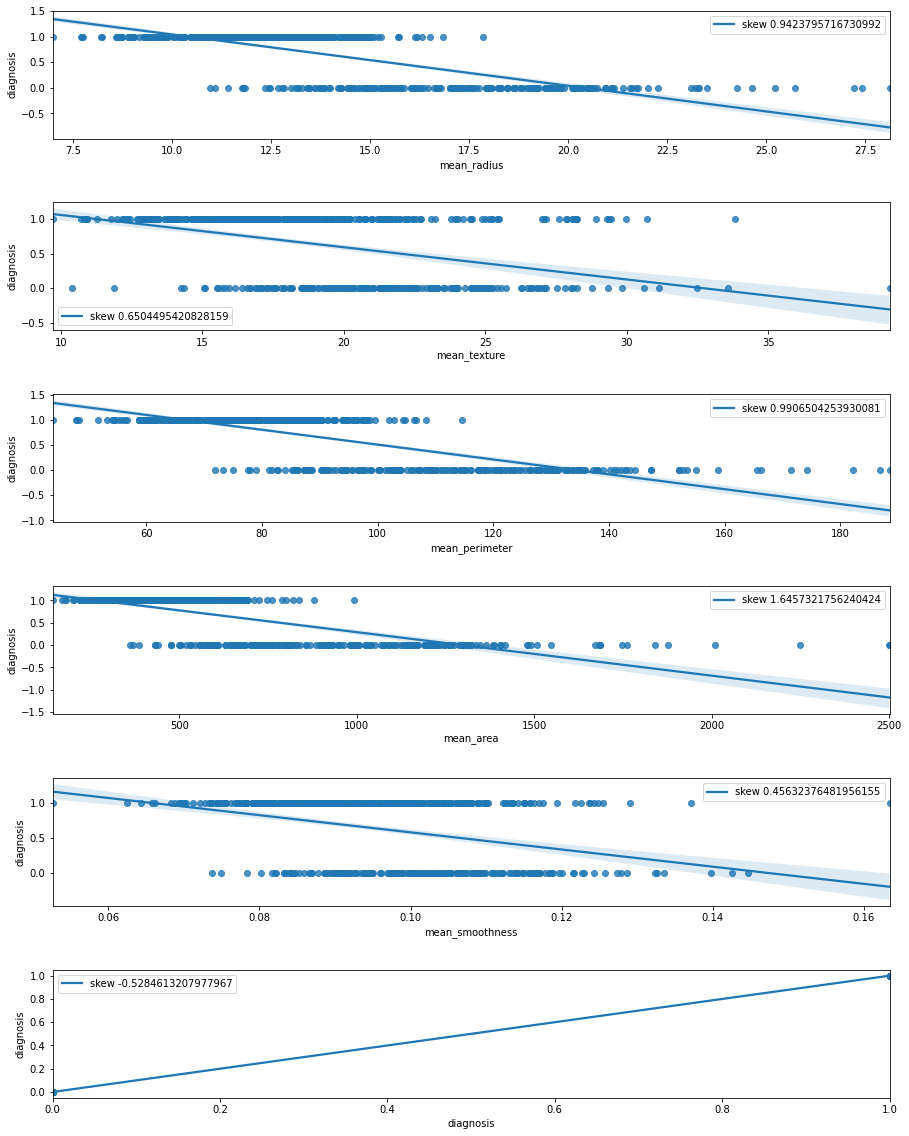

In [13]:
plt.figure(figsize=(15,20))
for i, col in enumerate(df.columns):
  plt.subplot(6,1,i+1)
  plt.subplots_adjust(wspace=0.5,hspace=0.5)
  sns.regplot(x=df[col],y=df['diagnosis']).legend([f"skew {str(df[col].skew())}"]) # Ploting regplot

In [14]:
x=df.drop('diagnosis',axis=1)
y=df['diagnosis']

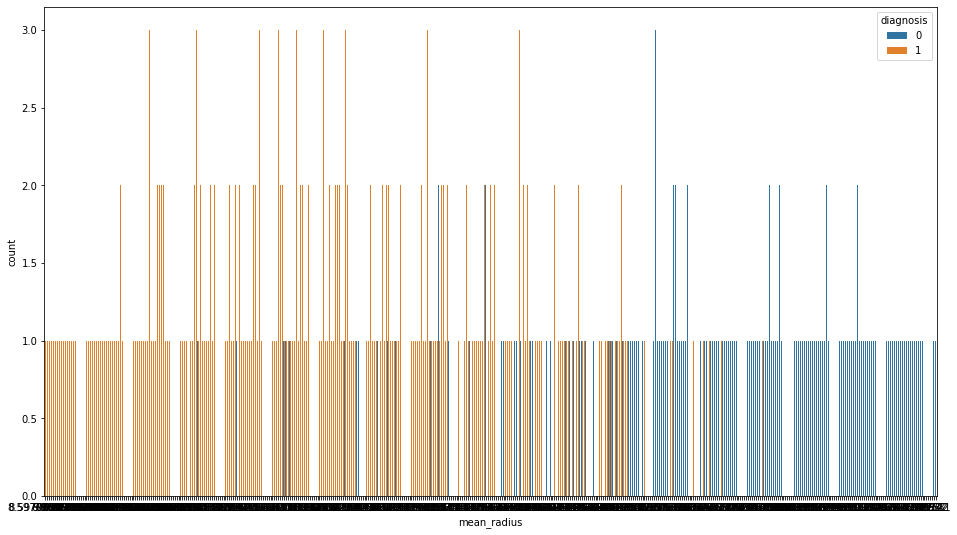

In [15]:
plt.figure(figsize=(16,9))
sns.countplot(x=x.mean_radius, hue=y)

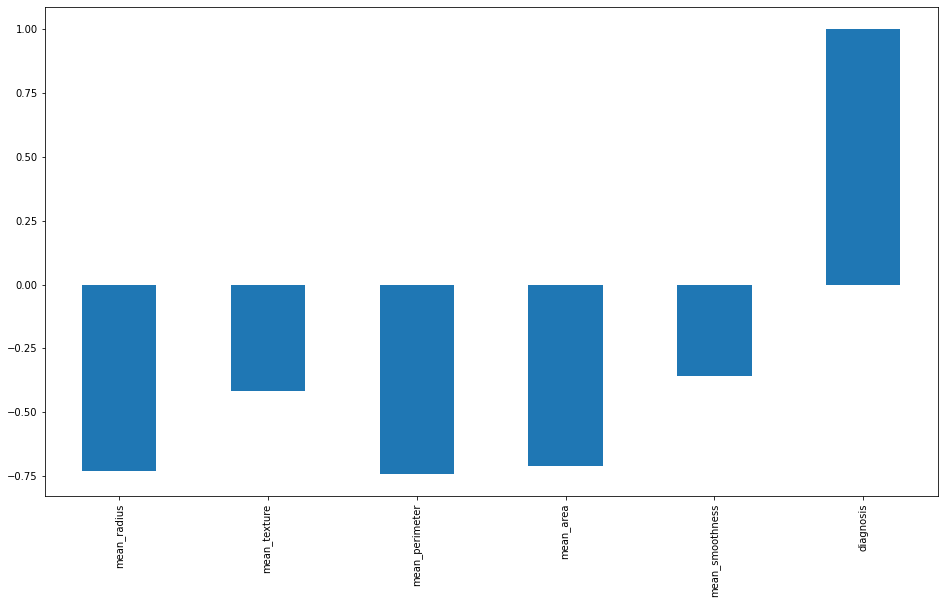

In [33]:
plt.figure(figsize=(16,9)) # To see the corr with diagnosis
df.corrwith(df['diagnosis']).plot.bar()

In [34]:
from sklearn.model_selection import train_test_split #For spliting the data

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.33) # spliting the data into x_train,x_test,y_train,y_test

In [39]:
from sklearn.preprocessing import StandardScaler # to scale the data

In [42]:
sc=StandardScaler()
sc.fit_transform(x_train) #scaling the x_train
sc.fit_transform(x_test) #scaling the x_test

array([[-4.52924413e-01, -1.92147990e-01, -4.29280059e-01,
        -4.90184170e-01,  1.81179536e-01],
       [ 1.45260534e+00,  4.23005698e-01,  1.37249228e+00,
         1.50684703e+00, -4.76500129e-01],
       [ 4.27683617e-01,  7.60671318e-03,  4.44267999e-01,
         3.32539685e-01,  8.38171251e-01],
       [-4.73540655e-01, -4.00982452e-01, -4.13173884e-01,
        -5.33631385e-01,  5.76750464e-01],
       [-7.26825908e-01, -1.13644295e+00, -7.02237336e-01,
        -7.33611827e-01,  1.94250575e-01],
       [ 1.94150478e+00,  2.24349742e+00,  2.07183934e+00,
         1.92283100e+00,  1.42980777e+00],
       [ 2.35677479e+00,  5.56932146e-01,  2.37277050e+00,
         2.59148672e+00,  6.38665914e-01],
       [ 1.04911604e+00, -9.97976621e-01,  1.00798412e+00,
         9.67916684e-01,  1.00001502e-01],
       [-1.96693983e-01, -8.14111496e-01, -2.00402838e-01,
        -3.72784249e-01,  7.41858330e-01],
       [-3.17640511e-02, -6.41596071e-01, -9.52888554e-02,
        -1.28124047e-01

In [43]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report # To see the accuracy
from sklearn.linear_model import LogisticRegression # importing model

In [44]:
lr=LogisticRegression() # importing LogisticRegression

In [48]:
lr.fit(x_train,y_train) # fiting, pred and see accuracy of LogisticRegression
y_pred=lr.predict(x_test)
accuracy_score(y_test,y_pred)

0.9361702127659575

In [49]:
confusion_matrix(y_test,y_pred) # obsereve the confusion matrix by seing true positive, false positive, true negative and false negative

array([[ 64,   3],
       [  9, 112]])

In [55]:
from sklearn.svm import SVC # importing support vector classifier

In [61]:
svc=SVC() # fiting, pred and see accuracy of LogisticRegression
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
accuracy_score(y_test,y_pred)

0.8936170212765957

In [62]:
confusion_matrix(y_test,y_pred) # obsereve the confusion matrix by seing true positive, false positive, true negative and false negative

array([[ 47,  20],
       [  0, 121]])

In [99]:
from sklearn.ensemble import RandomForestClassifier # importing the Random Forest Classifier
rf=RandomForestClassifier() # initialize ,fiting, pred and see accuracy of RandomForestClassifier
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
accuracy_score(y_test,y_pred)

0.9574468085106383

In [64]:
confusion_matrix(y_test,y_pred) # obsereve the confusion matrix by seing true positive, false positive, true negative and false negative

array([[ 65,   2],
       [  5, 116]])

In [65]:
from sklearn.ensemble import AdaBoostClassifier # importing the AdaBoostClassifier
ab=AdaBoostClassifier()  # initialize ,fiting, pred and see accuracy of AdaBoostClassifier
ab.fit(x_train,y_train)
y_pred=ab.predict(x_test)
accuracy_score(y_test,y_pred)

0.9414893617021277

In [66]:
confusion_matrix(y_test,y_pred) # obsereve the confusion matrix by seing true positive, false positive, true negative and false negative

array([[ 64,   3],
       [  8, 113]])

In [67]:
from sklearn.ensemble import GradientBoostingClassifier # importing the GradientBoostingClassifier
gb=GradientBoostingClassifier()  # initialize ,fiting, pred and see accuracy of GradientBoostingClassifier
gb.fit(x_train,y_train)
y_pred=gb.predict(x_test)
accuracy_score(y_test,y_pred)

0.9468085106382979

In [68]:
confusion_matrix(y_test,y_pred) # obsereve the confusion matrix by seing true positive, false positive, true negative and false negative

array([[ 64,   3],
       [  7, 114]])

In [70]:
import xgboost # importing the xgboost classifier
xg=xgboost.XGBClassifier()  # initialize ,fiting, pred and see accuracy of XGBClassifier
xg.fit(x_train,y_train)
y_pred=xg.predict(x_test)
accuracy_score(y_test,y_pred)

0.9574468085106383

In [72]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

In [74]:
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

xg_grid = GridSearchCV(xg,             # Initialize GridSearchCV with parameters
                        parameters,
                        cv = 2,
                        n_jobs = 5,
                        verbose=True)

xg_grid.fit(x_train, # fiting GridSearchCV
         y_train)

print(xg_grid.best_score_) # Seeing the score
print(xg_grid.best_params_) # seeing the best params

Fitting 2 folds for each of 9 candidates, totalling 18 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


0.9054698263984569
{'colsample_bytree': 0.7, 'learning_rate': 0.03, 'max_depth': 6, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}


[Parallel(n_jobs=5)]: Done  18 out of  18 | elapsed: 10.6min finished


In [75]:
xg_grid.best_estimator_ # seeing the best estimaters

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0,
              learning_rate=0.03, max_delta_step=0, max_depth=6,
              min_child_weight=4, missing=None, n_estimators=500, n_jobs=1,
              nthread=4, objective='reg:linear', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=1,
              subsample=0.7, verbosity=1)

In [83]:
xg1=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1, # putting the best params and again see the accuracy
              colsample_bynode=1, colsample_bytree=0.7, gamma=0, 
              learning_rate=0.03, max_delta_step=0, max_depth=6,
              min_child_weight=4, missing=None, n_estimators=500, n_jobs=1,
              nthread=4, objective='reg:linear', random_state=42, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=1, 
              subsample=0.7, verbosity=1)
xg1.fit(x_train,y_train)
y_pred=xg1.predict(x_test)
accuracy_score(y_test,y_pred) # The accuracy still not good as Random Forest

0.9521276595744681

In [94]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
params = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
random_grid = GridSearchCV(rf,params,cv = 2,
                        n_jobs = -1,
                        verbose=True)
random_grid.fit(x_train,y_train)
print(random_grid.best_score_) # Seeing the score
print(random_grid.best_params_) # seeing the best params

Fitting 2 folds for each of 4320 candidates, totalling 8640 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   31.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  9.9min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed: 15.6min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed: 22.6min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed: 30.8min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed: 40.0min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed: 50.8min
[Parallel(n_jobs=-1)]: Done 4992 tasks      | elapsed: 61.0min
[Parallel(n_jobs=-1)]: Done 6042 tasks      | elapsed: 71.5min
[Parallel(n_jobs=-1)]: Done 7192 tasks      | elapsed: 83.0min
[Parallel(n_jobs=-1)]: Done 8442 tasks      | elapsed: 95.5min
[Parallel(n_jobs=-1)]: Done 8640 out of 8640 | elapsed: 97.5min finished


0.9159685863874345
{'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


In [95]:
random_grid.best_estimator_ # seeing the best estimaters

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [104]:
rf1=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
rf1.fit(x_train,y_train)
y_pred=rf1.predict(x_test)
accuracy_score(y_test,y_pred) # So we choose the random forest with this prameterz

0.9574468085106383

In [109]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94        67
           1       0.98      0.95      0.97       121

    accuracy                           0.96       188
   macro avg       0.95      0.96      0.95       188
weighted avg       0.96      0.96      0.96       188



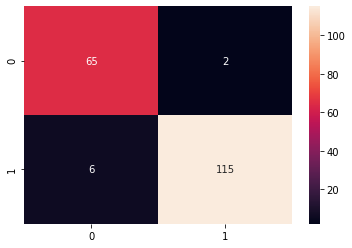

In [116]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d') # Seeing the classification report

In [117]:
rf1.fit(x,y) # Fiting the entire data 
# We don't need to scale it down beacuse random forest don't need this and insensitive to scaling down

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [118]:
import pickle  ## Import Pickle to save the model
  
filename = '/content/drive/MyDrive/Health App/Model/brest_cancer_rf_model.sav' #specifying the path to save the model
pickle.dump(rf1, open(filename, 'wb')) # Finally dump the model